## Proof of Concept - JPEG Compression

### This notebook shows the process of JPEG compression using python.

---


In [219]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


#### Step 1: Color Space Conversion (Only for color images)
The process of the JPEG starts with color space conversion. This process is not applicable to gray-scale image, where there is only one luminance component for gray scale image.



> Loading a rgb image  

matplotlib treats dimensions as (r,g,b)

Image loaded successfully.
Image shape: (256, 256, 3)
Image dtype: uint8
Image size: 196608 pixels
Image channels: 3
Image width: 256 pixels
Image height: 256 pixels


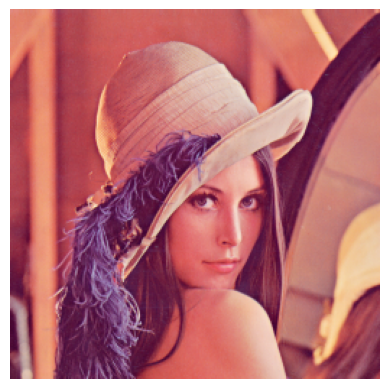

In [220]:
sample_color_image = os.path.join('..', 'images', 'lena_color_256.tif')
sample_color_image = cv2.imread(sample_color_image, cv2.IMREAD_UNCHANGED)

print('Image loaded successfully.')
print(f'Image shape: {sample_color_image.shape}')
print(f'Image dtype: {sample_color_image.dtype}')
print(f'Image size: {sample_color_image.size} pixels')
print(f'Image channels: {sample_color_image.shape[2]}')
print(f'Image width: {sample_color_image.shape[1]} pixels')
print(f'Image height: {sample_color_image.shape[0]} pixels')

# Convert BGR to RGB
sample_color_image_rgb = cv2.cvtColor(sample_color_image, cv2.COLOR_BGR2RGB)
plt.imshow(sample_color_image_rgb)
plt.axis('off')
plt.show()

> Converting to YCbCr space

Image channel shape: (256, 256, 3)


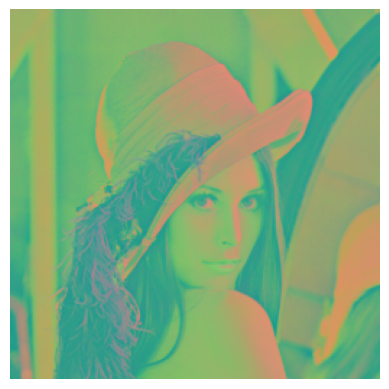

In [221]:
sample_color_image_ycbcr = cv2.cvtColor(sample_color_image, cv2.COLOR_BGR2YCrCb)
print(f'Image channel shape: {sample_color_image_ycbcr.shape}')
plt.imshow(sample_color_image_ycbcr)
plt.axis('off')
plt.show()

#### Step 2. Down Sampling (Only for Color images)
The transformation into the YCbCr color model enables the next step, which is to reduce the spatial resolution of the Cb and Cr components (called "down sampling" or "chroma sub sampling"). The ratios at which the down sampling can be done on JPEG are 4:4:4 (no down sampling), 4:2:2 (reduce by factor of 2 in horizontal direction), and most commonly 4:2:0(reduce by factor of 2 in horizontal and vertical directions).

> Implementing 4:2:0 (Horizontal and Vertical Subsampling)

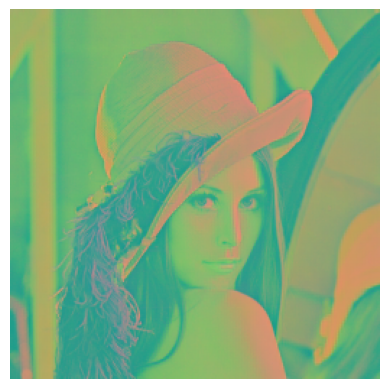

In [222]:
# 4:2:0 subsampling on YCbCr image by taking mean for Cb and Cr channels
sample_color_image_ycbcr_subsampled = sample_color_image_ycbcr.copy()
sample_color_image_cb = sample_color_image_ycbcr[:, :, 1]
sample_color_image_cr = sample_color_image_ycbcr[:, :, 2]
sample_color_image_ycbcr_subsampled[::2, ::2, 1] = cv2.resize(sample_color_image_cb, (0, 0), fx=0.5, fy=0.5)
sample_color_image_ycbcr_subsampled[::2, ::2, 2] = cv2.resize(sample_color_image_cr, (0, 0), fx=0.5, fy=0.5)
sample_color_image_ycbcr_subsampled[1::2, ::2, 1] = sample_color_image_ycbcr_subsampled[::2, ::2, 1] 
sample_color_image_ycbcr_subsampled[1::2, ::2, 2] = sample_color_image_ycbcr_subsampled[::2, ::2, 2]
sample_color_image_ycbcr_subsampled[::2, 1::2, 1] = sample_color_image_ycbcr_subsampled[::2, ::2, 1]
sample_color_image_ycbcr_subsampled[::2, 1::2, 2] = sample_color_image_ycbcr_subsampled[::2, ::2, 2]
sample_color_image_ycbcr_subsampled[1::2, 1::2, 1] = sample_color_image_ycbcr_subsampled[::2, ::2, 1]
sample_color_image_ycbcr_subsampled[1::2, 1::2, 2] = sample_color_image_ycbcr_subsampled[::2, ::2, 2]

plt.imshow(sample_color_image_ycbcr_subsampled)
plt.axis('off')
plt.show()

> loading a grayscale image 

Image loaded successfully.
Image shape: (256, 256)
Image dtype: uint8
Image size: 65536 pixels
Image width: 256 pixels
Image height: 256 pixels


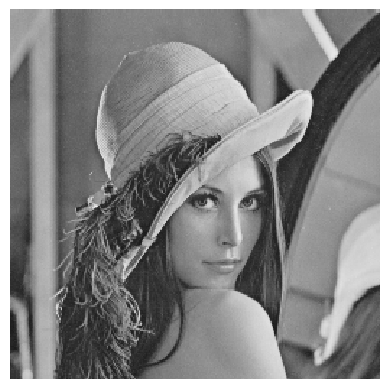

In [223]:
sample_gray_image = os.path.join('..', 'images', 'lena_gray_256.tif')
sample_gray_image = cv2.imread(sample_gray_image, cv2.IMREAD_UNCHANGED)
print('Image loaded successfully.')
print(f'Image shape: {sample_gray_image.shape}')
print(f'Image dtype: {sample_gray_image.dtype}')
print(f'Image size: {sample_gray_image.size} pixels')
print(f'Image width: {sample_gray_image.shape[1]} pixels')
print(f'Image height: {sample_gray_image.shape[0]} pixels')
plt.imshow(sample_gray_image, cmap='gray', interpolation='none', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#### Step 3: Block Splitting
After sub sampling, each channel must be split into 8×8 blocks (of pixels).

Blocks shape: (32, 32, 8, 8)


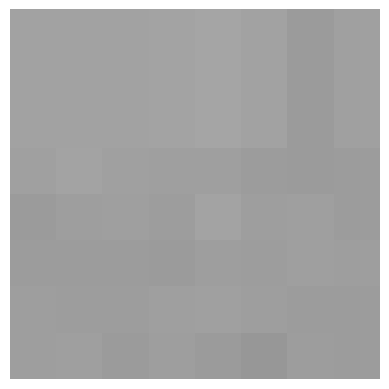

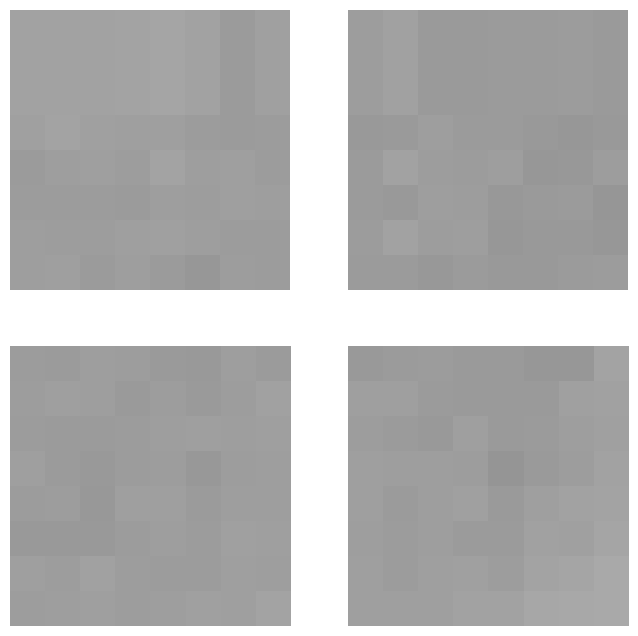

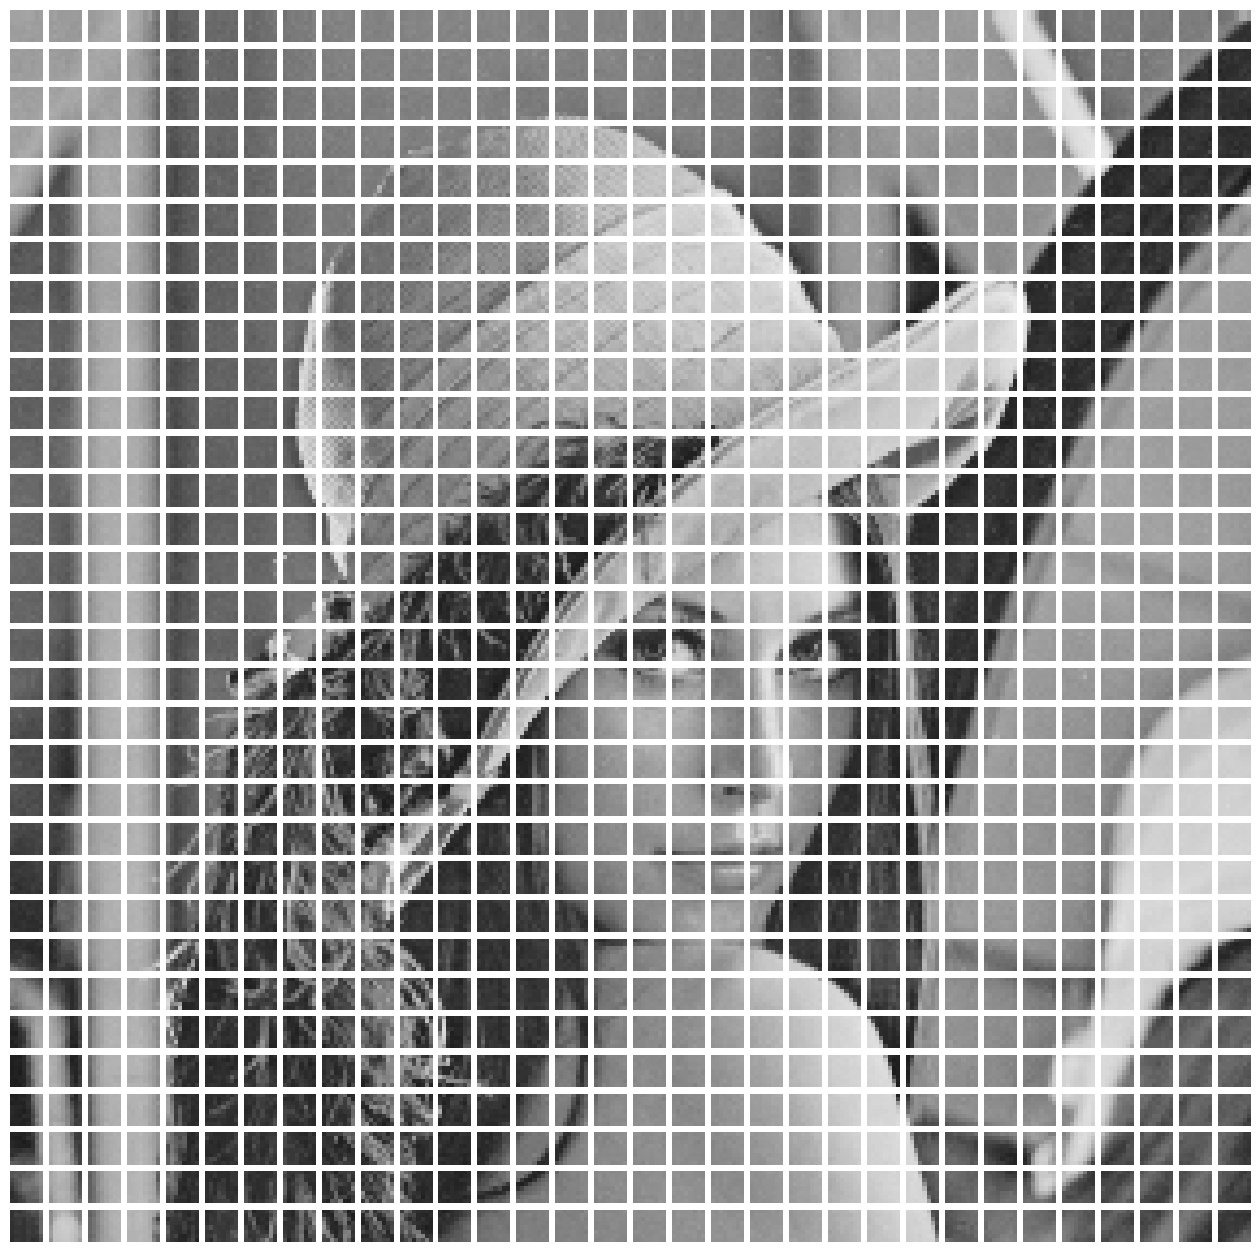

In [224]:
# splitting the image into blocks of 8x8 pixels
sample_gray_image_blocks = np.zeros((sample_gray_image.shape[0] // 8, sample_gray_image.shape[1] // 8, 8, 8), dtype=sample_gray_image.dtype)
for i in range(0, sample_gray_image.shape[0], 8):
    for j in range(0, sample_gray_image.shape[1], 8):
        sample_gray_image_blocks[i // 8, j // 8] = sample_gray_image[i:i + 8, j:j + 8]
print(f'Blocks shape: {sample_gray_image_blocks.shape}')
# Displaying the first block
plt.imshow(sample_gray_image_blocks[0, 0], cmap='gray' , vmin=0, vmax=255)
plt.axis('off')
plt.show()
# Displaying the first 4 blocks
plt.figure(figsize=(8, 8))
for i in range(2):
    for j in range(2):
        plt.subplot(2, 2, i * 2 + j + 1)
        plt.imshow(sample_gray_image_blocks[i, j], cmap='gray' , vmin=0, vmax=255)
        plt.axis('off')
plt.show()
# Displaying all blocks
plt.figure(figsize=(16, 16))
for i in range(sample_gray_image_blocks.shape[0]):
    for j in range(sample_gray_image_blocks.shape[1]):
        plt.subplot(sample_gray_image_blocks.shape[0], sample_gray_image_blocks.shape[1], i * sample_gray_image_blocks.shape[1] + j + 1)
        plt.imshow(sample_gray_image_blocks[i, j], cmap='gray', interpolation='none' , vmin=0, vmax=255)
        plt.axis('off')
plt.show()

These blocks are then passed into the DCT pipeline to extract coefficients for each of them

#### Step 4: Applying DCT 


> Understanding numbers repr in python

In [253]:
print(101, type(11))
print(0b111, type(0b111))
print(format(11, '08b'), type(format(11, '08b')))
print(np.array([1, 0, 1, 1, 0, 1, 0, 1], dtype=np.uint8), type(np.array([1, 0, 1, 1, 0, 1, 0, 1], dtype=np.uint8)))

def interpret_as_binary(val):
        return int(str(val), 2)  # convert decimal int to binary int

interpret_as_binary(10011)  # 19
(1 << 15)

101 <class 'int'>
7 <class 'int'>
00001011 <class 'str'>
[1 0 1 1 0 1 0 1] <class 'numpy.ndarray'>


32768

> Making DCT Coeffs matrix

0.3535533905932738 -> Shifted: 11 -> Binary: 0000000000001011
0.3535533905932738 -> Shifted: 11 -> Binary: 0000000000001011
0.3535533905932738 -> Shifted: 11 -> Binary: 0000000000001011
0.3535533905932738 -> Shifted: 11 -> Binary: 0000000000001011
0.3535533905932738 -> Shifted: 11 -> Binary: 0000000000001011
0.3535533905932738 -> Shifted: 11 -> Binary: 0000000000001011
0.3535533905932738 -> Shifted: 11 -> Binary: 0000000000001011
0.3535533905932738 -> Shifted: 11 -> Binary: 0000000000001011
0.4903926402016152 -> Shifted: 16 -> Binary: 0000000000010000
0.4157348061512726 -> Shifted: 13 -> Binary: 0000000000001101
0.27778511650980114 -> Shifted: 9 -> Binary: 0000000000001001
0.09754516100806417 -> Shifted: 3 -> Binary: 0000000000000011
-0.0975451610080641 -> Shifted: 65533 -> Binary: 1111111111111101
-0.277785116509801 -> Shifted: 65527 -> Binary: 1111111111110111
-0.4157348061512727 -> Shifted: 65523 -> Binary: 1111111111110011
-0.4903926402016152 -> Shifted: 65520 -> Binary: 1111111111

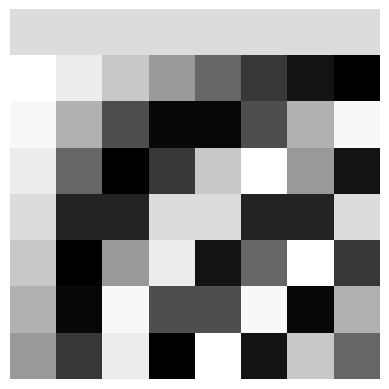

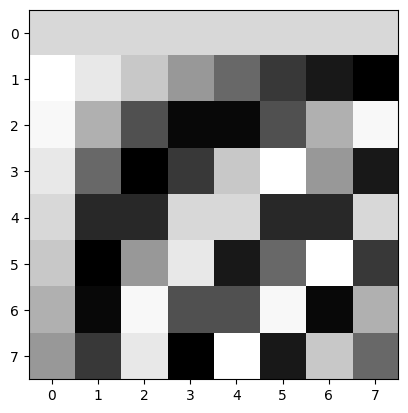

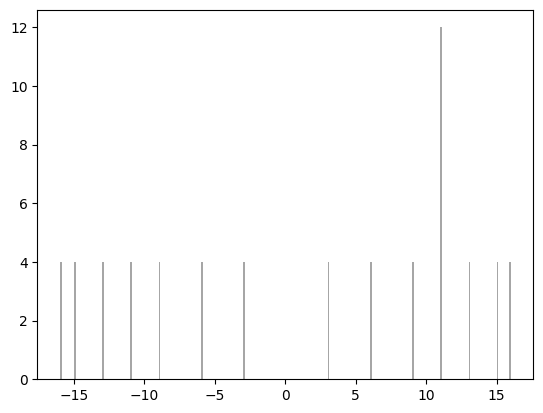

(array([-16, -15, -13, -11,  -9,  -6,  -3,   3,   6,   9,  11,  13,  15,
         16], dtype=int16),
 array([ 4,  4,  4,  4,  4,  4,  4,  4,  4,  4, 12,  4,  4,  4],
       dtype=int64))

In [341]:
def dct_matrix(n):
    D = np.zeros((n, n))
    for k in range(n):
        for i in range(n):
            if k == 0:
                D[k, i] = np.sqrt(1/n)
            else:
                D[k, i] = np.sqrt(2/n) * np.cos(np.pi*(2*i+1)*k/(2*n))
    return D

def bin_array_to_int(bin_arr: np.ndarray) -> int:
    """Converts a 16-bit binary NumPy array to a signed integer."""
    val = int("".join(str(b) for b in bin_arr), 2)
    return val if val < (1 << 15) else val - (1 << 16)

def int_to_bin_array(val: int, width:int = 16) -> np.ndarray:
    """Converts signed integer to by default 16-bit binary NumPy array (Q11.5 format)."""
    if val < 0:
        val = (1 << width) + val
    bin_str = format(val, f'0{width}b')
    return np.array([int(b) for b in bin_str], dtype=np.uint8)

def to_q11_5(value: float, to_print: bool = False) -> np.ndarray:
    """
    Converts a floating-point number to 16-bit Q11.5 fixed-point representation
    and returns it as a NumPy array of bits (length 16).

    Parameters:
        value (float): Input floating point number.
        to_print (bool): If True, prints the intermediate steps.

    Returns:
        np.ndarray: 16-bit binary number as numpy array (dtype=uint8)
    """
    max_val = (2**10) - 2**(-5)  # 1023.96875
    min_val = -2**10             # -1024.0

    # Clamp to Q11.5 range
    value = min(max(value, min_val), max_val)

    # Convert to fixed-point scaled integer
    shifted = int(round(value * 2**5))  # Q11.5 means 5 fractional bits

    # Convert to 16-bit two's complement binary
    if shifted < 0:
        shifted = (1 << 16) + shifted

    bin_str = format(shifted, '016b')  # padded to 16 bits
    if to_print:
        print(f"{value} -> Shifted: {shifted} -> Binary: {bin_str}")
    
    return np.array([int(bit) for bit in bin_str], dtype=np.uint8)


n = 8
D = dct_matrix(n)
# print(D)
# q_matrix = [[to_q11_5(D[i,j]) for j in range(n)] for i in range(n)]
D_q11_5 = np.zeros((n, n, 16), dtype=np.int8)     # int64 needed to hold the 16-bit values (upto 1111111111111111)
for i in range(n):
    for j in range(n):
        D_q11_5[i, j] = to_q11_5(D[i, j], to_print=True)
        # print(f"{D[i, j]} -> {D_q11_5[i, j]}")

# converting each element to int for plot
def convert_binmat_to_valmat(array: np.ndarray) -> np.ndarray:
    """Converts a binary matrix to a value matrix."""
    return np.array([[bin_array_to_int(array[i, j]) for j in range(n)] for i in range(n)], dtype=np.int16)

D_q11_5_val = convert_binmat_to_valmat(D_q11_5)  # will have original values into 2^5
plt.imshow(D, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()
plt.imshow(D_q11_5_val, cmap='gray', interpolation='none')
plt.show()
# make a histogram of the D_q11_5 values
plt.hist(D_q11_5_val.flatten(), bins=256, color='gray', alpha=0.7)
plt.show()
np.unique(D_q11_5_val, return_counts=True)

In [436]:
def right_shift_bin_array(bin_arr: np.ndarray, shift: int) -> np.ndarray:
    """Logical right shift (unsigned) on a binary NumPy array."""
    shifted = bin_arr[:-shift]  # Shift right
    shifted = np.concatenate((np.zeros(shift, dtype=bin_arr.dtype), shifted))  # Fill left with zeros
    return shifted

def left_shift_bin_array(bin_arr: np.ndarray, shift: int) -> np.ndarray:
    """Logical left shift on a binary NumPy array."""
    val = bin_array_to_int(bin_arr)
    shifted = val << shift
    shifted &= 0xFFFF  # ensure 16-bit wraparound
    return int_to_bin_array(shifted)

def binary_matmul(A: np.ndarray, B: np.ndarray, debug=False) -> np.ndarray:
    """
    Performs matrix multiplication on matrices of 16-bit binary NumPy arrays (Q11.5 format),
    with fixed-point multiplication and step-wise truncation.
    """
    m, n = A.shape[:2]
    n2, p = B.shape[:2]
    # print(f"Matrix A shape: {A.shape}, Matrix B shape: {B.shape}")
    if n != n2:
        raise ValueError("Matrix dimensions do not match")

    result = np.empty((m, p, 16), dtype=np.int8)

    for i in range(m):
        for j in range(p):
            acc = 0
            for k in range(n):
                a_val = bin_array_to_int(A[i][k])
                b_val = bin_array_to_int(B[k][j])
                product = a_val * b_val  # Q11.5 × Q11.5 = Q22.10
                if debug: 
                    print(f"Multiplying {a_val} and {b_val} gives {product}")

                # Clamp to signed 33-bit range
                if product < -2147483648 or product > 2147483647:
                    raise OverflowError("Multiplication result out of bounds")

                acc += product

            # converting from Q22.10 to Q11.5
            q22_10_acc = acc
            q22_10_acc_arr = int_to_bin_array(q22_10_acc, width=32)
            # Right shift by 5 bits to convert to Q11.5
            acc = right_shift_bin_array(q22_10_acc_arr, 5)
            acc = acc[-16:]  # Keep only the last 16 bits
            # Ensure the result is clamped to Q11.5 range
            if debug:
                print(f"Accumulated value: {q22_10_acc} -> {q22_10_acc_arr} -> clamped to Q11.5 range: {acc} : {bin_array_to_int(acc)}")

            result[i][j] = acc

    return result



A = np.array([
    [to_q11_5(1.0), to_q11_5(0.125)],
    [to_q11_5(-2.0), to_q11_5(0.0)]
])

B = np.array([
    [to_q11_5(0.125), to_q11_5(1.0)],
    [to_q11_5(0.125), to_q11_5(0.125)]
])

C = binary_matmul(A, B, debug=True)
print(C)

Multiplying 32 and 4 gives 128
Multiplying 4 and 4 gives 16
Accumulated value: 144 -> [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0] -> clamped to Q11.5 range: [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0] : 4
Multiplying 32 and 32 gives 1024
Multiplying 4 and 4 gives 16
Accumulated value: 1040 -> [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0] -> clamped to Q11.5 range: [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0] : 32
Multiplying -64 and 4 gives -256
Multiplying 0 and 4 gives 0
Accumulated value: -256 -> [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0] -> clamped to Q11.5 range: [1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0] : -8
Multiplying -64 and 32 gives -2048
Multiplying 0 and 4 gives 0
Accumulated value: -2048 -> [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0] -> clamped to Q11.5 range: [1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0] : -64
[[[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]

 [[1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
  [1 1 1

> Converting pixel values to Q11.5 format and applyinf 2-D DCT to the 8x8 blocks

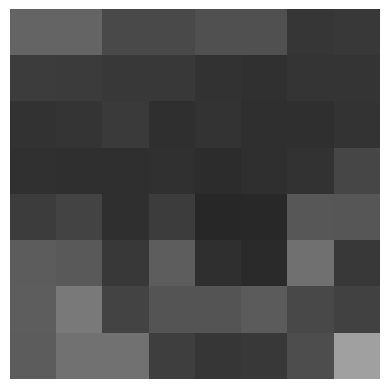

unique vals in q11.5 block: [-2848 -2816 -2752 -2688 -2592 -2560 -2528 -2496 -2464 -2432 -2400 -2368
 -2304 -2272 -2240 -2208 -2176 -2144 -2112 -1984 -1952 -1856 -1792 -1760
 -1728 -1632 -1536 -1408 -1344 -1312 -1216 -1184 -1152 -1120  -896  -512
  -480  -448  -224  1024]
DCT coefficients:
Unique values in sample_gray_image_block_q11_5: [-455.0625   -73.6875   -40.9375   -40.       -34.71875  -30.75
  -26.3125   -22.84375  -22.0625   -19.       -17.09375  -16.9375
  -15.1875   -14.21875  -13.21875  -12.25     -10.78125   -9.4375
   -4.84375   -4.4375    -4.28125   -4.09375   -3.03125   -2.96875
   -2.78125   -2.6875    -1.9375    -0.84375   -0.5625     1.0625
    1.53125    2.34375    3.         3.9375     4.         5.78125
    6.53125    6.78125    8.375      8.46875    8.96875    9.6875
    9.75       9.84375   11.875     12.5625    15.        15.4375
   15.75      20.8125    20.9375    21.21875   22.125     23.5625
   29.9375    30.65625   31.46875   32.40625   32.6875    32.96875


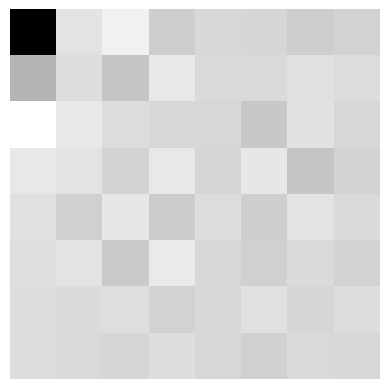

In [437]:
i, j = 16, 16
plt.imshow(sample_gray_image_blocks[i, j], cmap='gray', interpolation='none', vmin=0, vmax=255)
plt.axis('off')
plt.show()

sample_gray_image_block_q11_5 = np.zeros((sample_gray_image_blocks.shape[0], sample_gray_image_blocks.shape[1], 8, 8, 16), dtype=np.int64)

q11_5_block = np.zeros((8, 8, 16), dtype=np.int8)
for k in range(8):
    for l in range(8):
        q11_5_block[k, l] = to_q11_5(sample_gray_image_blocks[i, j, k, l] - 128)
sample_gray_image_block_q11_5[i, j] = q11_5_block

# Displaying the first block
print("unique vals in q11.5 block:", np.unique(convert_binmat_to_valmat(sample_gray_image_block_q11_5[i, j])))

sample_gray_image_block_dct = np.zeros((sample_gray_image_blocks.shape[0], sample_gray_image_blocks.shape[1], 8, 8, 16), dtype=np.int64)

O = binary_matmul(D_q11_5, sample_gray_image_block_q11_5[i, j])   # C @ A
sample_gray_image_block_dct[i, j] = binary_matmul(O, D_q11_5.transpose(1, 0, 2))
        
print("DCT coefficients:")
dct_block = convert_binmat_to_valmat(sample_gray_image_block_dct[i, j]) / 32
uniques, counts = np.unique(dct_block, return_counts=True)
print(f'Unique values in sample_gray_image_block_q11_5: {uniques} with counts: {counts}')

print(dct_block)
plt.imshow(dct_block, cmap='gray', interpolation='none')
plt.axis('off')
plt.show()

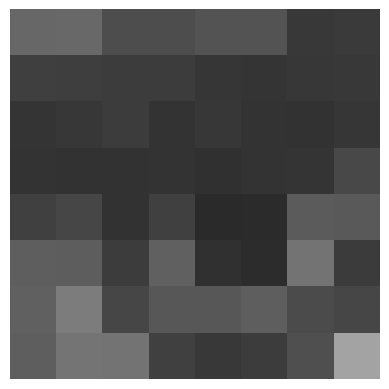

RMSE: 3.3495504145718966, PSNR: 37.631073232560894 dB


In [438]:
from scipy.fftpack import idct
#recosntruct using scipy
def reconstruct(dct_coeffs, and_eval = False, original = None):
    # Reconstruct the block using the inverse DCT
    reconstructed_block = idct(idct(dct_coeffs, axis=0, norm='ortho'), axis=1, norm='ortho') + 128
    rmse, psnr = None, None
    if and_eval:
        # Calculate RMSE
        rmse = np.sqrt(np.mean((original - reconstructed_block) ** 2))
        # Calculate PSNR
        psnr = 20 * np.log10(255 / rmse)
    
    return reconstructed_block, rmse, psnr

reconstructed_block, rmse, psnr = reconstruct(dct_block, and_eval=True, original=sample_gray_image_blocks[i, j])
plt.imshow(reconstructed_block, cmap='gray', interpolation='none',  vmin=0, vmax=255)
plt.axis('off')
plt.show()
print(f"RMSE: {rmse}, PSNR: {psnr} dB")

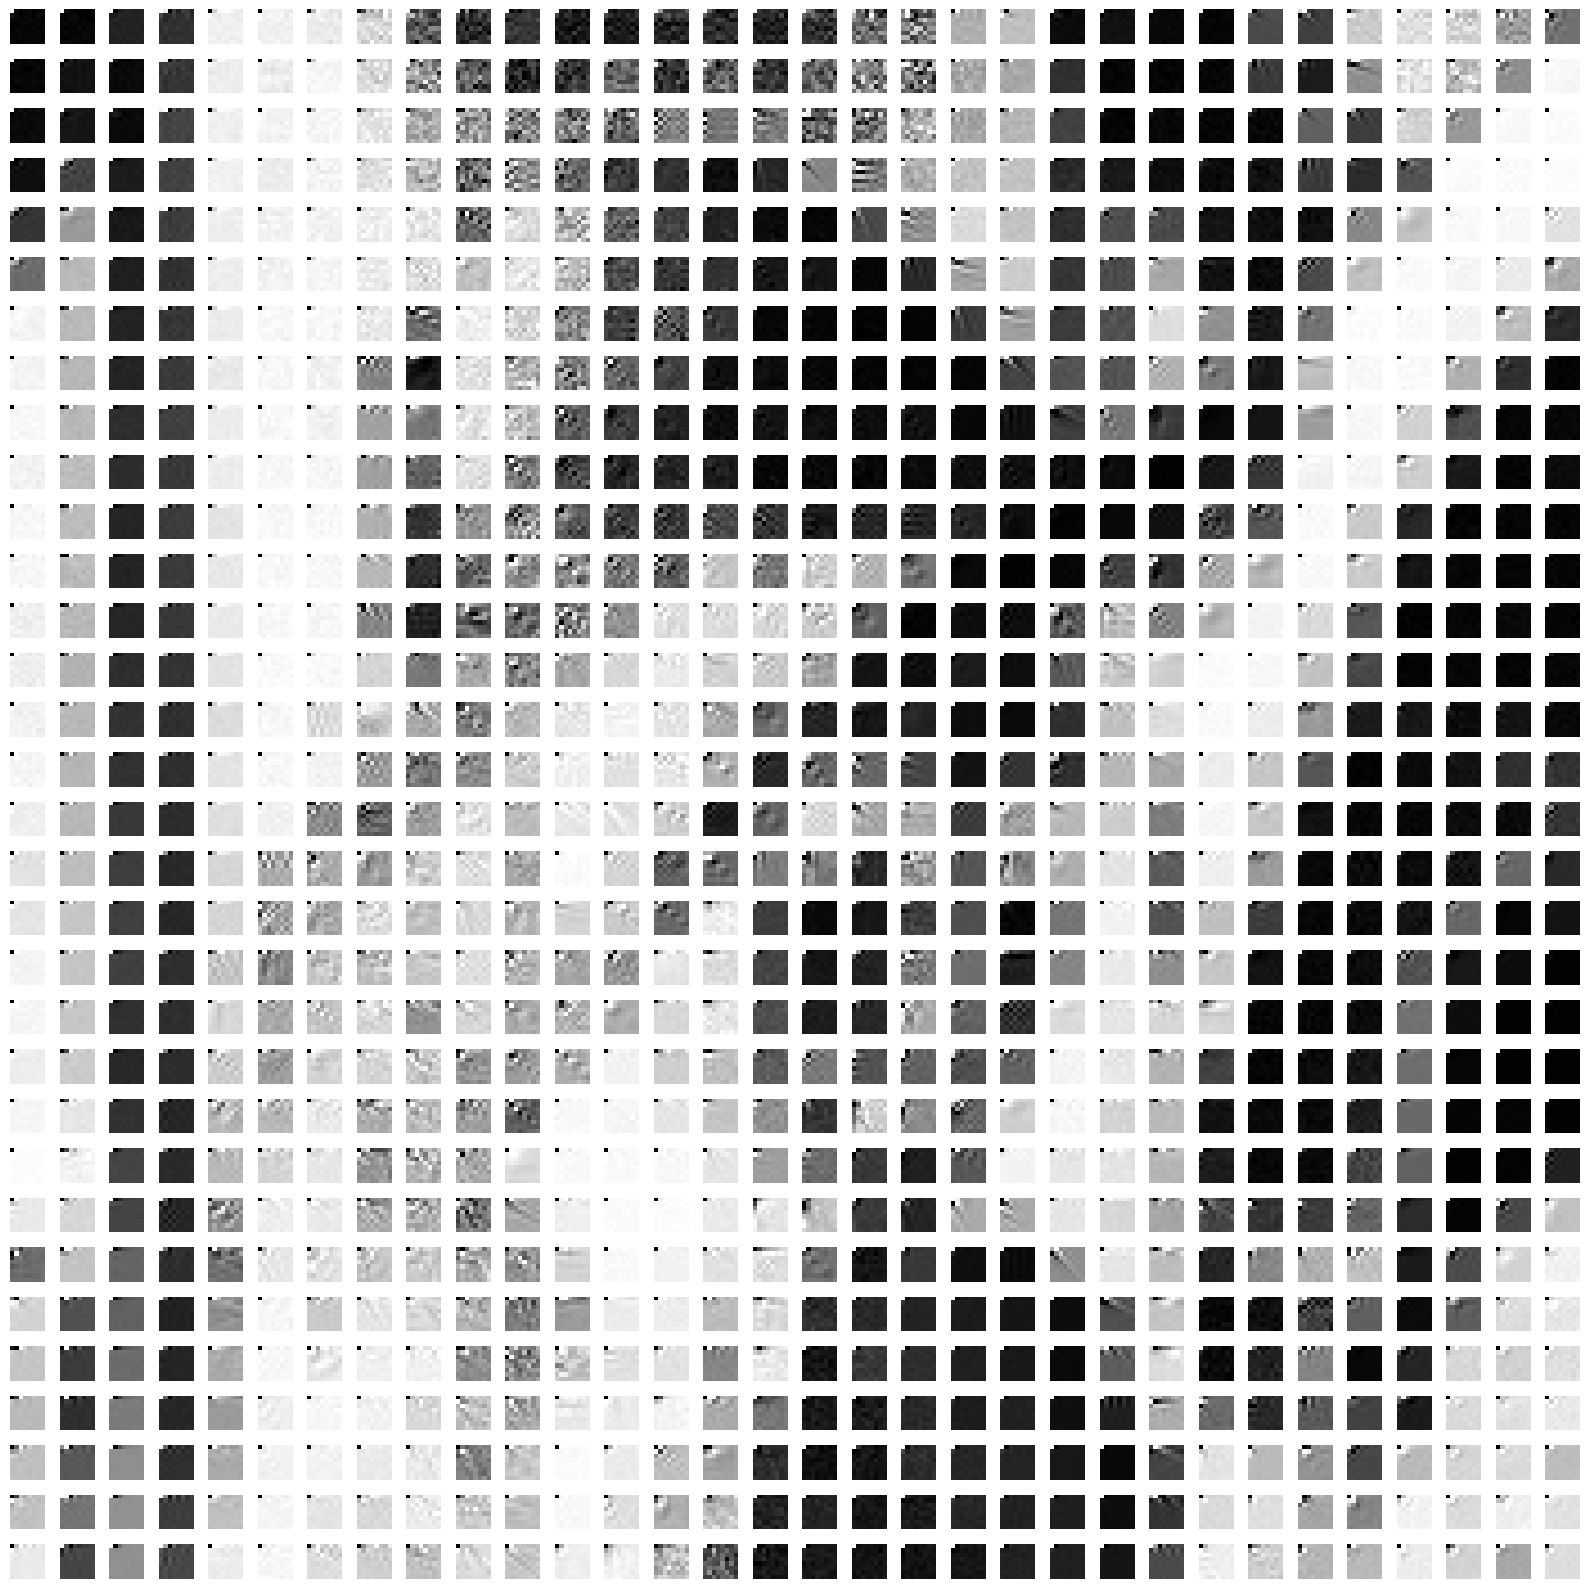

In [439]:
sample_gray_image_blocks_q11_5 = np.zeros((sample_gray_image_blocks.shape[0], sample_gray_image_blocks.shape[1], 8, 8, 16), dtype=np.int64)
for i in range(sample_gray_image_blocks.shape[0]):
    for j in range(sample_gray_image_blocks.shape[1]):
        q11_5_block = np.zeros((8, 8, 16), dtype=np.int64)
        for k in range(8):
            for l in range(8):
                q11_5_block[k, l] = to_q11_5(sample_gray_image_blocks[i, j, k, l] - 128)
        sample_gray_image_blocks_q11_5[i, j] = q11_5_block

# Displaying the first block
# print("unique vals in q11.5 block 1 :", np.unique(sample_gray_image_blocks_q11_5[0, 0]))

sample_gray_image_blocks_dct_coeffs = np.zeros((sample_gray_image_blocks.shape[0], sample_gray_image_blocks.shape[1], 8, 8), dtype=np.float32)
for i in range(sample_gray_image_blocks.shape[0]):
    for j in range(sample_gray_image_blocks.shape[1]):
        O = binary_matmul(D_q11_5, sample_gray_image_blocks_q11_5[i, j])   # C @ A
        sample_gray_image_blocks_dct_coeffs[i, j] = convert_binmat_to_valmat(binary_matmul(O, D_q11_5.transpose(1, 0, 2)))
        
# normalise the DCT coefficients to 0 1
sample_gray_image_blocks_dct_coeffs /= 32

plt.figure(figsize=(16, 16))
for i in range(sample_gray_image_blocks_dct_coeffs.shape[0]):
    for j in range(sample_gray_image_blocks_dct_coeffs.shape[1]):
        plt.subplot(sample_gray_image_blocks_dct_coeffs.shape[0], sample_gray_image_blocks_dct_coeffs.shape[1], i * sample_gray_image_blocks_dct_coeffs.shape[1] + j + 1)
        plt.imshow(sample_gray_image_blocks_dct_coeffs[i, j], cmap='gray', interpolation='none')
        plt.axis('off')
plt.tight_layout()
plt.show()

> Trying to recosntruct from the DCT coefficients (using all of them)

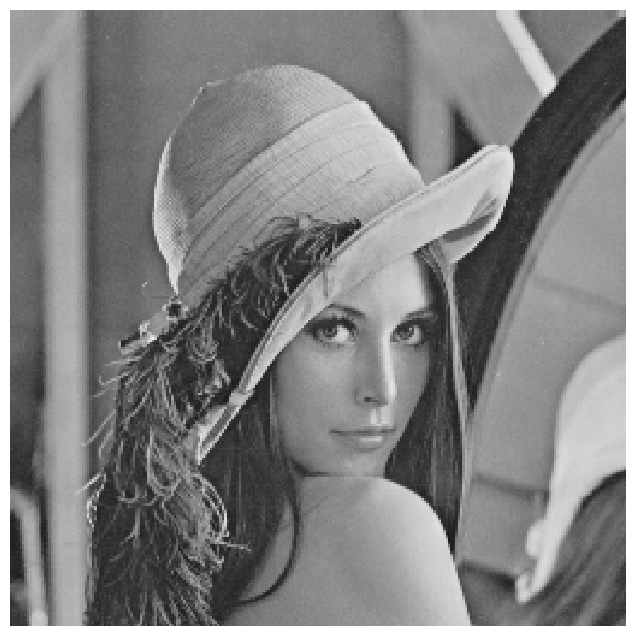

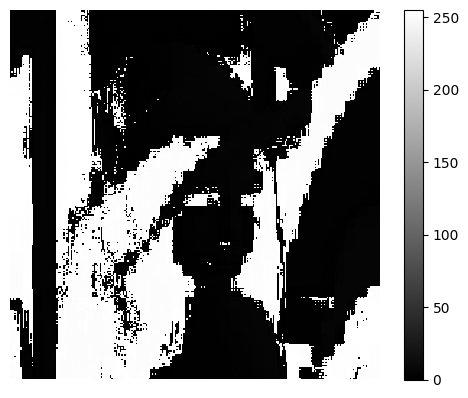

RMSE: 2.4444106513876074, PSNR: 40.36732025934512 dB


In [440]:
# reconstructing the image from the DCT blocks
sample_gray_image_blocks_dct_reconstructed = np.zeros((sample_gray_image_blocks.shape[0], sample_gray_image_blocks.shape[1], 8, 8), dtype=np.float32)
for i in range(sample_gray_image_blocks.shape[0]):
    for j in range(sample_gray_image_blocks.shape[1]):
        sample_gray_image_blocks_dct_reconstructed[i, j] = reconstruct(sample_gray_image_blocks_dct_coeffs[i, j])[0]

sample_gray_image_reconstructed = np.zeros((sample_gray_image.shape[0], sample_gray_image.shape[1]), dtype=np.float32)
for i in range(sample_gray_image_blocks.shape[0]):
    for j in range(sample_gray_image_blocks.shape[1]):
        sample_gray_image_reconstructed[i * 8:i * 8 + 8, j * 8:j * 8 + 8] = sample_gray_image_blocks_dct_reconstructed[i, j]
        
sample_gray_image_reconstructed = np.clip(sample_gray_image_reconstructed, 0, 255).astype(np.uint8)
plt.figure(figsize=(8, 8))
plt.imshow(sample_gray_image_reconstructed, cmap='gray', interpolation='none', vmin=0, vmax=255)
plt.axis('off')
plt.show()
# Displaying the difference between the original and reconstructed image
plt.imshow(sample_gray_image - sample_gray_image_reconstructed, cmap='gray', interpolation='none', vmin=0, vmax=255)
plt.colorbar()
plt.axis('off')
plt.show()

# evaluate psnr and rmse
rmse = np.sqrt(np.mean((sample_gray_image - sample_gray_image_reconstructed) ** 2))
psnr = 20 * np.log10(255 / rmse)
print(f"RMSE: {rmse}, PSNR: {psnr} dB")